In [1]:
import autokeras as ak
import numpy as np
import pandas as pd
import tensorflow as tf
import sys

Using TensorFlow backend


In [2]:
new_model = tf.keras.models.load_model('structured_data_regressor/best_model')

# Check its architecture
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 51)]              0         
                                                                 
 multi_category_encoding (M  (None, 51)                0         
 ultiCategoryEncoding)                                           
                                                                 
 dense (Dense)               (None, 1024)              53248     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                32800 

In [17]:
# It is trained on:
train_file_path = "../csv_files/All_raw_non_NaN.csv"
train_data = pd.read_csv(train_file_path)
train_data.dtypes

/var/folders/kq/hk1l39ys077bc7f9741ypg800000gn/T/ipykernel_28553/309145083.py:3: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_file_path)


Unnamed: 0                          int64
date_forecast                      object
absolute_humidity_2m:gm3          float64
air_density_2m:kgm3               float64
ceiling_height_agl:m              float64
clear_sky_energy_1h:J             float64
clear_sky_rad:W                   float64
cloud_base_agl:m                  float64
dew_or_rime:idx                   float64
dew_point_2m:K                    float64
diffuse_rad:W                     float64
diffuse_rad_1h:J                  float64
direct_rad:W                      float64
direct_rad_1h:J                   float64
effective_cloud_cover:p           float64
elevation:m                       float64
fresh_snow_12h:cm                 float64
fresh_snow_1h:cm                  float64
fresh_snow_24h:cm                 float64
fresh_snow_3h:cm                  float64
fresh_snow_6h:cm                  float64
is_day:idx                        float64
is_in_shadow:idx                  float64
msl_pressure:hPa                  

In [64]:
test_A = pd.read_parquet("../A/X_test_estimated.parquet")
test_B = pd.read_parquet("../B/X_test_estimated.parquet")
test_C = pd.read_parquet("../C/X_test_estimated.parquet")

test_A['site'] = 'A'
test_B['site'] = 'B'
test_C['site'] = 'C'

test_data = pd.concat([test_A, test_B, test_C], ignore_index=True)
test_data['data_type'] = 'test'
test_data['data_quality'] = 'estimated'
test_data = test_data.sort_values(['date_forecast', 'site'], ascending=[True, True])

start = 405214
stop = 8640 + start
test_data['Unnamed: 0'] = range(start, stop)


In [65]:
#test_data.to_csv("../csv_files/All_raw_non_NaN_test_data.csv", index=False)

In [61]:
train_str = pd.read_csv("../csv_files/All_raw_non_NaN.csv").drop('pv_measurement', axis='columns').astype(str)
train_str

/var/folders/kq/hk1l39ys077bc7f9741ypg800000gn/T/ipykernel_28553/3500095546.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  train_str = pd.read_csv("../csv_files/All_raw_non_NaN.csv").drop('pv_measurement', axis='columns').astype(str)


,Unnamed: 0,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,data_type,data_quality,date_calc,site
0,0,2019-01-01 00:00:00,5.6,1.239,1226.4,0.0,0.0,1226.4,0.0,275.4,...,73.9,19275.9,2.5,1.1,2.2,-0.0,train,observed,nan,B
1,8,2019-01-01 01:00:00,5.4,1.241,1157.6,0.0,0.0,1157.6,0.0,274.7,...,99.4,12777.3,3.4,1.3,3.1,-0.0,train,observed,nan,B
2,16,2019-01-01 02:00:00,5.5,1.238,1087.6,0.0,0.0,1087.6,0.0,275.0,...,98.4,12776.7,3.8,2.0,3.3,-0.0,train,observed,nan,B
3,24,2019-01-01 03:00:00,5.3,1.24,1016.4,0.0,0.0,1016.4,0.0,274.5,...,97.8,8399.9,4.3,2.4,3.6,-0.0,train,observed,nan,B
4,32,2019-01-01 04:00:00,5.5,1.239,1029.0,0.0,0.0,1029.0,0.0,275.0,...,97.6,4102.8,5.9,5.0,3.2,-0.0,train,observed,nan,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93018,405200,2023-04-30 22:00:00,4.5,1.279,1534.3,0.0,0.0,518.9,0.0,272.3,...,97.4,17022.0,4.3,3.4,2.6,-0.0,train,estimated,2023-04-29 07:00:05,B
93019,405201,2023-04-30 22:00:00,4.4,1.279,1446.6,0.0,0.0,540.7,0.0,271.9,...,98.7,13028.4,3.5,2.6,2.4,-0.0,train,estimated,2023-04-29 07:00:05,C
93020,405211,2023-04-30 23:00:00,4.5,1.281,1054.2,0.0,0.0,542.4,0.0,272.2,...,100.0,9923.2,3.7,2.8,2.4,-0.0,train,estimated,2023-04-29 07:00:05,A
93021,405212,2023-04-30 23:00:00,4.5,1.281,1055.8,0.0,0.0,542.1,0.0,272.2,...,100.0,9955.5,3.7,2.8,2.5,-0.0,train,estimated,2023-04-29 07:00:05,B


In [66]:
#test_data_str = test_data.astype(str)#.drop(['date_forecast', 'date_calc'], axis='columns')
test_str = pd.read_csv("../csv_files/All_raw_non_NaN_test_data.csv").astype(str)
test_str_ordered = test_str[train_str.columns]
test_str_ordered

,Unnamed: 0,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,data_type,data_quality,date_calc,site
0,405214,2023-05-01 00:00:00,4.4,1.286,912.7,0.0,0.0,1041.2,0.0,271.7,...,80.7,30210.7,4.0,2.2,3.4,-0.0,test,estimated,2023-04-30 07:00:04,A
1,405215,2023-05-01 00:00:00,4.3,1.283,912.3,0.0,0.0,1039.9,0.0,271.7,...,80.7,31329.5,4.0,2.2,3.4,-0.0,test,estimated,2023-04-30 07:00:04,B
2,405216,2023-05-01 00:00:00,4.2,1.286,nan,0.0,0.0,1178.0,0.0,271.1,...,73.7,31411.0,3.5,1.5,3.1,-0.0,test,estimated,2023-04-30 07:00:04,C
3,405217,2023-05-01 00:15:00,4.3,1.287,912.7,0.0,0.0,1054.8,0.0,271.7,...,77.0,30003.6,4.0,2.1,3.4,-0.0,test,estimated,2023-04-30 07:00:04,A
4,405218,2023-05-01 00:15:00,4.3,1.283,912.3,0.0,0.0,1053.1,0.0,271.7,...,77.1,31181.6,4.0,2.1,3.4,-0.0,test,estimated,2023-04-30 07:00:04,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,413849,2023-07-03 23:30:00,9.0,1.207,2015.0,0.0,0.0,1408.6,0.0,282.7,...,100.0,40138.1,2.0,1.6,-1.1,0.0,test,estimated,2023-07-02 07:00:31,B
8636,413850,2023-07-03 23:30:00,8.9,1.207,2005.5,0.0,0.0,1222.8,0.0,282.5,...,100.0,39145.1,1.7,1.6,-0.6,0.0,test,estimated,2023-07-02 07:00:31,C
8637,413851,2023-07-03 23:45:00,9.0,1.208,2015.6,0.0,0.0,1339.6,0.0,282.6,...,100.0,39768.8,1.9,1.6,-1.1,0.0,test,estimated,2023-07-02 07:00:31,A
8638,413852,2023-07-03 23:45:00,9.0,1.207,2014.9,0.0,0.0,1343.6,0.0,282.6,...,100.0,40204.5,1.9,1.6,-1.1,0.0,test,estimated,2023-07-02 07:00:31,B


In [67]:
preds = new_model.predict(test_str_ordered)

270/270 [==============================] - 0s 1ms/step


In [77]:
test_and_pred = test_str_ordered
test_and_pred['prediction'] = preds
test_and_pred_ordered = test_and_pred.sort_values(['site', 'date_forecast'], ascending=[True, True])
test_and_pred_ordered

/var/folders/kq/hk1l39ys077bc7f9741ypg800000gn/T/ipykernel_28553/3315294617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_and_pred['prediction'] = preds


,Unnamed: 0,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,data_type,data_quality,date_calc,site,prediction
0,405214,2023-05-01 00:00:00,4.4,1.286,912.7,0.0,0.0,1041.2,0.0,271.7,...,30210.7,4.0,2.2,3.4,-0.0,test,estimated,2023-04-30 07:00:04,A,78.033516
3,405217,2023-05-01 00:15:00,4.3,1.287,912.7,0.0,0.0,1054.8,0.0,271.7,...,30003.6,4.0,2.1,3.4,-0.0,test,estimated,2023-04-30 07:00:04,A,78.107689
6,405220,2023-05-01 00:30:00,4.3,1.287,912.7,0.0,0.0,1068.3,0.0,271.6,...,29797.1,3.9,2.1,3.3,-0.0,test,estimated,2023-04-30 07:00:04,A,78.529961
9,405223,2023-05-01 00:45:00,4.3,1.287,912.7,0.0,0.0,1081.9,0.0,271.6,...,29618.6,3.9,2.0,3.3,-0.0,test,estimated,2023-04-30 07:00:04,A,79.591354
12,405226,2023-05-01 01:00:00,4.3,1.287,nan,0.0,0.0,1095.4,0.0,271.6,...,29507.5,3.9,2.0,3.3,-0.0,test,estimated,2023-04-30 07:00:04,A,79.387611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,413841,2023-07-03 22:45:00,9.0,1.207,2003.5,0.0,0.0,1573.0,0.0,282.6,...,39008.3,1.8,1.6,-0.7,0.0,test,estimated,2023-07-02 07:00:31,C,96.625725
8630,413844,2023-07-03 23:00:00,9.0,1.207,2005.6,0.0,0.0,1471.0,0.0,282.5,...,39026.0,1.7,1.6,-0.7,0.0,test,estimated,2023-07-02 07:00:31,C,95.582115
8633,413847,2023-07-03 23:15:00,9.0,1.207,2005.5,0.0,0.0,1346.9,0.0,282.5,...,39081.3,1.7,1.6,-0.6,0.0,test,estimated,2023-07-02 07:00:31,C,94.294121
8636,413850,2023-07-03 23:30:00,8.9,1.207,2005.5,0.0,0.0,1222.8,0.0,282.5,...,39145.1,1.7,1.6,-0.6,0.0,test,estimated,2023-07-02 07:00:31,C,100.258926


In [87]:
sys.path.append('../')
from data_prep import data_manager

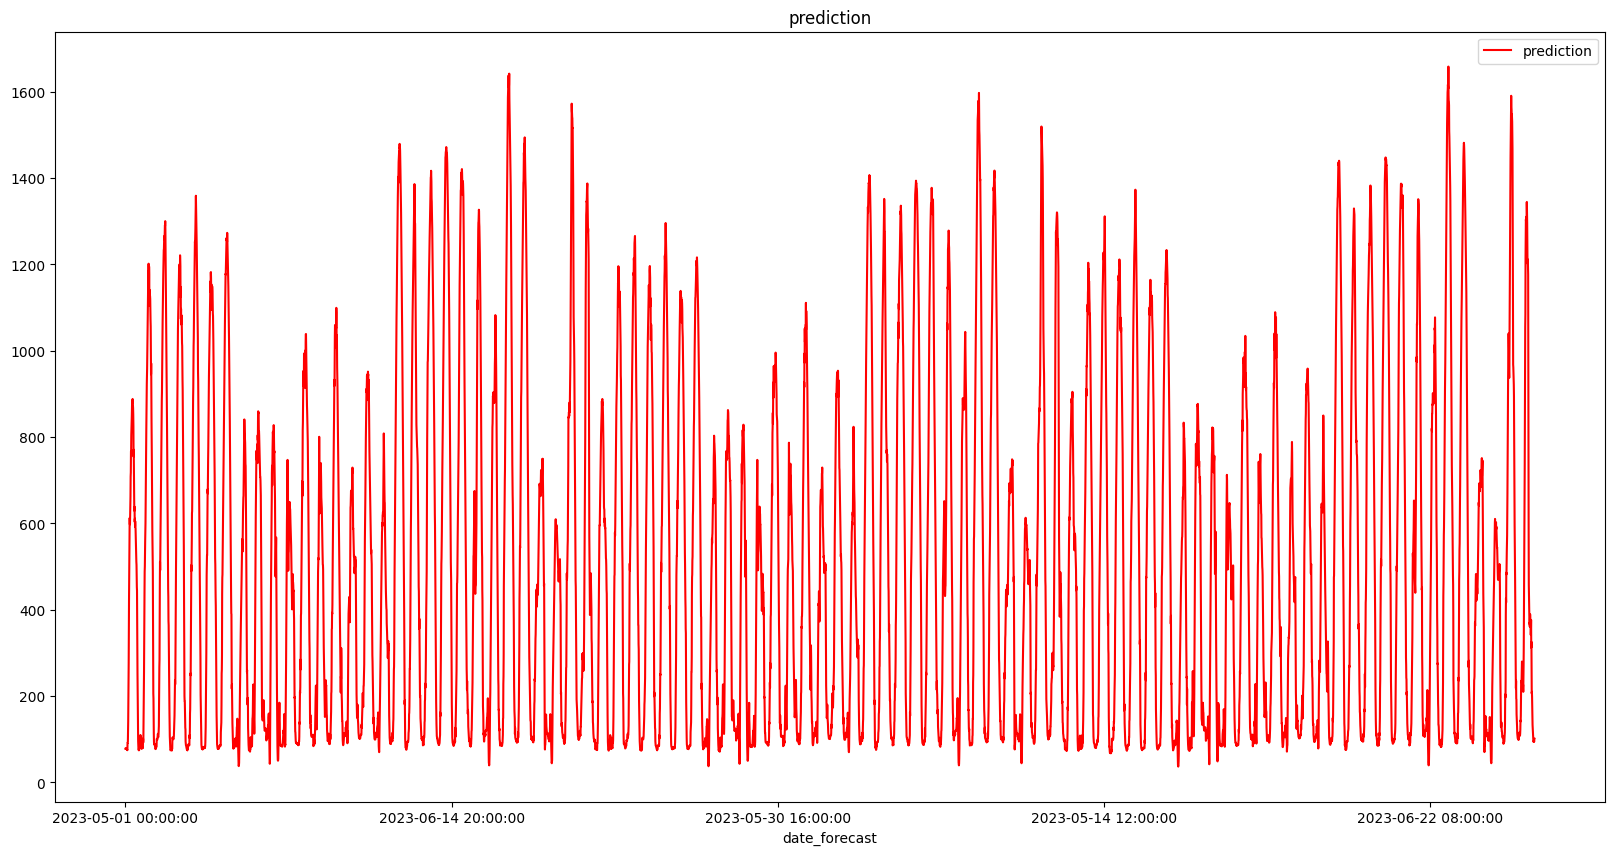

In [92]:
dm = data_manager.Data_Manager
dm.plot_feature(dm, test_and_pred_ordered, 'prediction')

In [ ]:
new_model.fea